In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# matplotlib 한글 깨짐 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv('credit_card_data(utf8).txt')

In [4]:
df['card_use_rate'] = df['num_usecard'] / df['num_opencard'] * 100

In [5]:
data_by_sex = df[df.pop_cd.str[0]=='Y'] # 지역x, 성별o
data_by_loc = df[df.pop_cd.str[0]=='L'] # 지역o, 성별x

In [6]:
# data_by_sex_90s = data_by_sex[data_by_sex.ages=='90대'] # 90대, 성별o
# data_by_loc_90s = data_by_loc[data_by_loc.ages=='90대'] # 90대, 지역o

In [7]:
data_by_seoul = data_by_loc[data_by_loc.city=='서울']
data_by_incheon = data_by_loc[data_by_loc.city=='인천']
data_by_gyeonggi = data_by_loc[data_by_loc.city=='경기']
data_by_capital = pd.concat([data_by_seoul,data_by_incheon,data_by_gyeonggi])

In [89]:
# data_by_seoul_10s = data_by_seoul[data_by_seoul.ages=='10대']
# data_by_seoul_20s = data_by_seoul[data_by_seoul.ages=='20대']
# data_by_seoul_30s = data_by_seoul[data_by_seoul.ages=='30대']
# data_by_seoul_40s = data_by_seoul[data_by_seoul.ages=='40대']
# data_by_seoul_50s = data_by_seoul[data_by_seoul.ages=='50대']
# data_by_seoul_60s = data_by_seoul[data_by_seoul.ages=='60대']
# data_by_seoul_70s = data_by_seoul[data_by_seoul.ages=='70대']
# data_by_seoul_80s = data_by_seoul[data_by_seoul.ages=='80대']
# data_by_seoul_90s = data_by_seoul[data_by_seoul.ages=='90대']

# data_by_seoul_10s.head(1)

In [8]:
data_by_10s = data_by_loc[data_by_loc.ages=='10대']
data_by_20s = data_by_loc[data_by_loc.ages=='20대']
data_by_30s = data_by_loc[data_by_loc.ages=='30대']
data_by_40s = data_by_loc[data_by_loc.ages=='40대']
data_by_50s = data_by_loc[data_by_loc.ages=='50대']
data_by_60s = data_by_loc[data_by_loc.ages=='60대']
data_by_70s = data_by_loc[data_by_loc.ages=='70대']
data_by_80s = data_by_loc[data_by_loc.ages=='80대']
data_by_90s = data_by_loc[data_by_loc.ages=='90대']

data_by_345 = pd.concat([data_by_30s ,data_by_40s ,data_by_50s])
data_by_678 = pd.concat([data_by_60s ,data_by_70s ,data_by_80s])

In [91]:
data_by_345.head()

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment,card_use_rate
864,L013,2016,1,777,3,서울,NaN,30대,1878000,4.77,...,1810000,870000,11360000,26170000,21290000,31640000,82180000,992000,246000,54.297694
865,L013,2016,2,820,3,서울,NaN,30대,1974000,4.27,...,2100000,890000,12310000,29600000,23150000,33690000,90970000,938000,231000,51.756440
866,L013,2016,3,820,3,서울,NaN,30대,1980000,4.28,...,2100000,940000,12300000,29600000,23470000,33910000,91120000,900000,208000,51.635514
867,L013,2016,4,821,3,서울,NaN,30대,1975000,4.28,...,2070000,960000,12310000,29550000,24090000,34160000,91580000,985000,238000,51.635514
868,L013,2016,5,821,3,서울,NaN,30대,1971000,4.26,...,2070000,980000,12340000,29730000,24530000,34380000,92360000,970000,229000,51.643192


In [92]:
df.columns

Index(['pop_cd', 'year', 'month', 'avg_score', 'avg_rat', 'city', 'sex',
       'ages', 'population', 'num_opencard', 'num_usecard',
       'monthly_card_spend', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment',
       'card_use_rate'],
      dtype='object')

In [9]:
# 경기동행지수 # coincident composite index
cci = pd.read_csv('경기동행지수_월별.csv') 
cci.head(3)

,year_month,year,month,cci
0,201601,2016,1,100.1
1,201602,2016,2,99.9
2,201603,2016,3,99.8


In [94]:
# plt.figure(figsize=(20,15))
# sns.heatmap(data=data_by_capital.corr(), annot=True,
#            fmt='.2f', linewidths=.5, cmap='Blues')

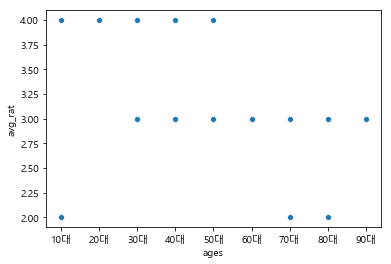

In [95]:
sns.scatterplot(x='ages', y='avg_rat', data=df)
# 10대의 신용등급은 2 또는 4
# 20대의 신용등급은 모두 4등급 / 60, 90대는 모두3등급
# 30,40,50대의 신용등급은 3등급, 4등급
# 70,80대는 2등급 또는 3등급

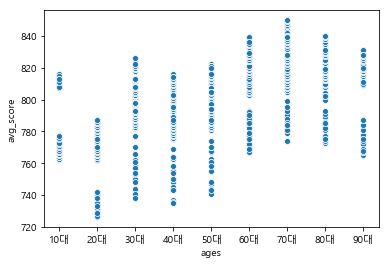

In [96]:
sns.scatterplot(x='ages', y='avg_score', data=df)

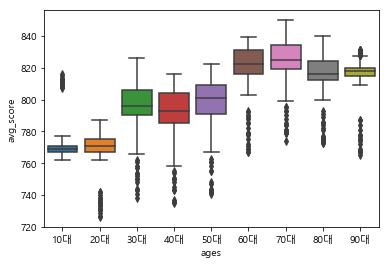

In [97]:
# boxplot은 평균이 아니라 중간값!!
sns.boxplot(x='ages', y='avg_score', data=df)

# 60,70,80대의 신용등급
# 30,40,50대의 신용등급

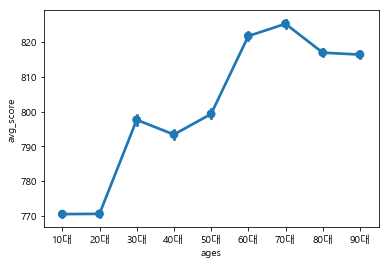

In [98]:
sns.pointplot(x='ages', y='avg_score', data=df)

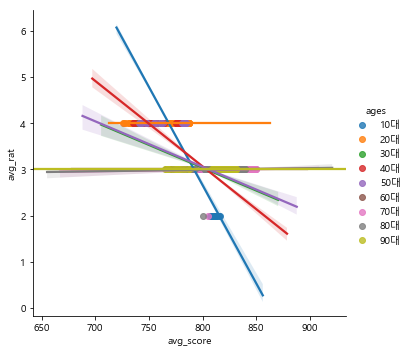

In [99]:
sns.lmplot(x='avg_score', y='avg_rat', hue='ages', data=df)
# 전국 90대 신용등급 평균이 3등급

In [19]:
# df = df[df['ages'] != '90대']
# df = df[df['ages'] != '80대']
# df = df[df['ages'] != '70대']
# df = df[df['ages'] != '60대']
# df = df[df['ages'] != '20대']
# df

In [20]:
# sns.lmplot(x='avg_score', y='avg_rat', hue='ages', data=df)

In [21]:
# # 봉영오빠 코드
# # 나이대 별 신용카드 갯수, 사용갯수, 월 카드 사용량으로 대출금액 예측?

# def Linear_model(age_data):    
#     x=age_data.drop(['monthly_cd_loan','monthly_card_spend','pop_cd','city','ages','sex','credit_card_payment','credit_card_installments_payment'], axis=1)
#     y=age_data['monthly_card_spend']
    
#     x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.5)
#     lm = LinearRegression()
#     lm.fit(x_train,y_train)
    
#     preditions= lm.predict(x_test)
    
#     plt.scatter(y_test,preditions)

In [22]:
# 나이에 따른 신용점수,월별 추세
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# # df.pop_cd.str[0]=='L'
# x = data_by_month['']
# y = data_by_20s['avg_score']
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)
# lm = LinearRegression()
# lm.fit(x_train, y_train)
# predictions = lm.predict(x_test)
# plt.scatter(y_test, predictions)

In [23]:
cci.head(1)

,year_month,year,month,cci
0,201601,2016,1,100.1


In [100]:
# import datetime
# for i in range(len(cci.year_month)):
#     cci['convert_date'][i] = datetime.datetime.strptime(str(cci.year_month[i]), "%Y%m").date()

In [25]:
# # len(cci) #24
# len(cci.convert_date)

In [26]:
# sns.kdeplot(cci['cci'])

In [27]:
# sns.barplot(x='convert_date', y='cci', data=cci)

In [28]:
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_loc)
# sns.lmplot('num_opencard', 'avg_score', data=data_by_loc)
# sns.lmplot('card_use_rate', 'avg_score', data=data_by_loc)

In [29]:
# sns.lmplot('card_use_rate', 'avg_score', data=data_by_20s)
# sns.lmplot('card_use_rate', 'avg_score', data=data_by_60s)
# sns.lmplot('card_use_rate', 'avg_score', data=data_by_70s)
# sns.lmplot('card_use_rate', 'avg_score', data=data_by_80s)
# sns.lmplot('card_use_rate', 'avg_score', data=data_by_90s)

In [30]:
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_10s)
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_20s)
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_30s)
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_40s)
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_50s)
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_60s)
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_70s)
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_80s)
# sns.lmplot('monthly_loan', 'avg_score', data=data_by_90s)

In [31]:
# sns.barplot(x='ages', y='monthly_bk_loan', hue='city', data=data_by_capital)

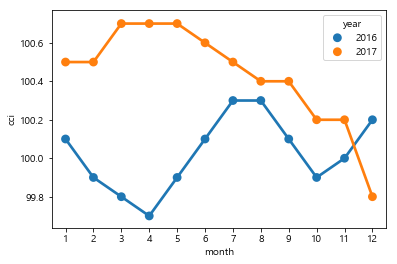

In [76]:
sns.pointplot(x='month', y='cci', hue='year',data=cci)

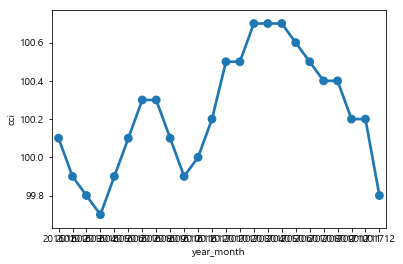

In [33]:
sns.pointplot(x='year_month', y='cci', data=cci)

In [78]:
# sns.pointplot(x='month', y='avg_score', hue='year',data=data_by_20s)

In [39]:
# for i in range(len(df)):
#     df['year_month'][i] = str(df['year'][i]) + str(df['month'][i])

In [103]:
# 월별 신용점수는 경기동행지수와 관련x

# fig = plt.figure()
# ax = fig.add_subplot(111)
# sns.pointplot(x='year_month', y='cci', data=cci, ax=ax, color='r')
# sns.pointplot(x='month', y='avg_score', hue='year', data=data_by_20s, ax=ax, color='r')
# sns.pointplot(x='month', y='avg_score', data=data_by_30s, ax=ax, color='y')
# sns.pointplot(x='month', y='avg_score', data=data_by_40s, ax=ax)
# sns.pointplot(x='month', y='avg_score', data=data_by_50s, ax=ax)
# sns.pointplot(x='month', y='avg_score', data=data_by_60s, ax=ax)
# sns.pointplot(x='month', y='avg_score', data=data_by_70s, ax=ax)
# sns.pointplot(x='month', y='avg_score', data=data_by_80s, ax=ax)
# sns.pointplot(x='month', y='avg_score', data=data_by_90s, ax=ax)

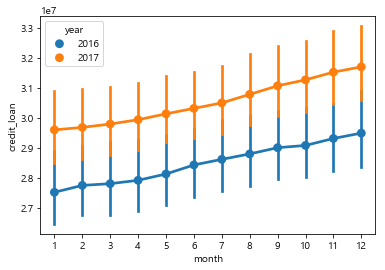

In [101]:
# 월별 총 대출, 신용대출은 경기동행지수와 관련x

fig = plt.figure()
ax = fig.add_subplot(111)
# sns.pointplot(x='month', y='monthly_loan', data=data_by_20s, ax=ax)
# sns.pointplot(x='month', y='monthly_loan', data=data_by_30s, ax=ax)
sns.pointplot(x='month', y='credit_loan', data=data_by_40s, ax=ax, hue='year')
# sns.pointplot(x='month', y='monthly_loan', data=data_by_50s, ax=ax)
# sns.pointplot(x='month', y='monthly_loan', data=data_by_60s, ax=ax)
# sns.pointplot(x='month', y='monthly_loan', data=data_by_70s, ax=ax)
# sns.pointplot(x='month', y='monthly_loan', data=data_by_80s, ax=ax)
# sns.pointplot(x='month', y='monthly_loan', data=data_by_90s, ax=ax)

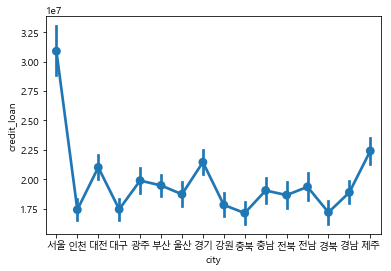

In [104]:
sns.pointplot(x='city', y='credit_loan', data=data_by_loc)

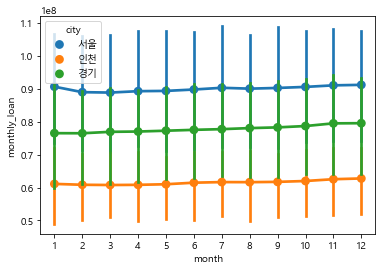

In [109]:
sns.pointplot(x='month', y='monthly_loan', hue='city', data=data_by_capital)

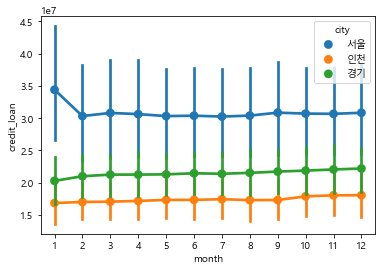

In [108]:
sns.pointplot(x='month', y='credit_loan', hue='city', data=data_by_capital)

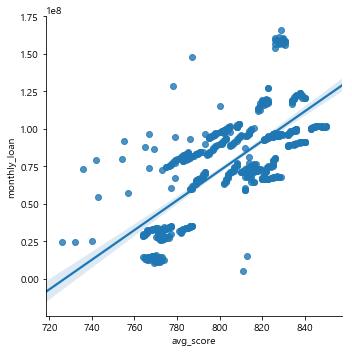

In [10]:
sns.lmplot(x='avg_score', y='monthly_loan', data=data_by_capital)

In [13]:
data_by_loc['avg_score_rate']=1

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:

for i in range(0,len(data_by_loc['avg_score'])):
    
    if data_by_loc['avg_score'][i]>825:
        
        data_by_loc['avg_score_rate'][i]="A"
        
    elif data_by_loc['avg_score'][i]>800:
        
        data_by_loc['avg_score_rate'][i]="B"
        
    elif data_by_loc['avg_score'][i]>775:
        
        data_by_loc['avg_score_rate'][i]="C"
        
        
    elif data_by_loc['avg_score'][i]>750:
        
        data_by_loc['avg_score_rate'][i]="D"
        
    elif data_by_loc['avg_score'][i]>725:
        
        data_by_loc['avg_score_rate'][i]="F"


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyError: 384